# Problème de flot maximal

On ne fera pas de preuve algorithmique.

## Définition

Soit $(V, E)$ un graphe pondéré positivement par une fonction $C$ (**Capacite**).
On se donne deux noeuds particulier dans le graphe qu'on appelera la  $S$ (**Source**) et $P$ (**Puit**)
- On appelle flot admissible une fonction $F$ (**Flot**) sur les arrêtes vérifiant les conditions suivantes:
$$\forall e \in E,\qquad 0\leq F(e) \leq C(e).$$
$$\forall v \in V\setminus\{S, P\}\qquad \sum_{e\in \mathcal{E}(v)} F(e) = \sum_{e\in \mathcal{S}(v)} F(e).$$
avec $\mathcal{E}(v):=\{(a, b) \in E\quad :\quad b=v\}$, $\mathcal{S}(v):=\{(a, b) \in E\quad :\quad a=v\}$
- On dira qu'un flot admissible est maximal si la quantitée suivante l'est:
$$\sum_{e\in \mathcal{E}(P)} F(e) - \sum_{e\in \mathcal{S}(P)}F(e)$$
**ATTENTION** on reformulera généralement le problème avec des arrêtes fictives.

# Exemple/Exercice -> 11h15

Rajouter les arguments pour justifier les légendes des images.




**CAPACITES**

<img src="elementaire.svg" width="600">


On a des poids positifs sur toutes les arrêtes.

**FLOT TRIVIAL**

<img src="elementaire_trivial.svg" width="600">

Il est admissible car rien ne sort ni ne rentre à chaque sommet et $0=0$.

**FLOT ADMISSIBLE**

<img src="elementaire_admissible.svg" width="600">

En $C$ on $5=2+3$ et en $C$ on a $3+2=5$.

**REMARQUE** Flot sortant de la source vaut $8$ comme le flot rentrant du puit!

**FLOT NON ADMISSIBLE**

<img src="elementaire_non_admissible.svg" width="600">

Car en $C$ on $5 < 2 + 4$ et en $B$ on a $2 + 4 > 5$.

**FLOT MAXIMAL**

<img src="elementaire_maximal.svg" width="600">

Le flot est admissible car 
- en $C$: $5=1+4$
- en $B$: $4+1=5$

Il est maximal car le flot sur les arrêtes sortantes de la source sont égaux aux capacités.

# Exemple plus compliqué

<img src="./dag_capacite.svg" alt="graphe avec capacité" width="800">

### Exercice -> 10h35

- Quelles sont les arrêtes rentrantes et sortantes associées à $F$?
$$\mathcal{E}(F)= \{(B,F),\quad (D,F)\quad, (E,F)\}$$
$$\mathcal{S}(F)= \{(F, C),\quad (F, G)\}$$

- Donner un flot admissible sur ce graphe.

Il suffit d'utiliser la fonction $F$ constante égale à $0$.

**REMARQUE** 
- On a rajouter des arrêtes fictives sur le dessin (celles avec des capacités valant $?$). L'une sort du puit $I$ l'autre rentre dans la source $A$.
- On peut alors reformuler le problème du flot maximal en demandant que la loi des noeuds s'appliquent également à la source et au puit, mais on cherche à maximiser les flots sur ces arrêtes fictives.

## Exercice -> 11h30

Déterminer le flot maximal du graphe ci-dessus.

<img src="./dag_maximal.svg" alt="flot maximal" width="800">

Cas plus délicat car la maximalité ne peut plus être prouvé de la même façon

<img src="./dag_plus_delicat.svg" alt="flot maximal?" width="800">

## Exercice 15min -> 11h55

Utiliser `networkx` pour résoudre le cas ci-dessus. 

**Indication** regarder le contenu du sous module `networkx.algorithms.flow`.

In [1]:
import networkx as nx

In [2]:
dir(nx.algorithms.flow)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boykov_kolmogorov',
 'boykovkolmogorov',
 'build_flow_dict',
 'build_residual_network',
 'capacity_scaling',
 'capacityscaling',
 'cost_of_flow',
 'dinitz',
 'dinitz_alg',
 'edmonds_karp',
 'edmondskarp',
 'gomory_hu',
 'gomory_hu_tree',
 'max_flow_min_cost',
 'maxflow',
 'maximum_flow',
 'maximum_flow_value',
 'min_cost_flow',
 'min_cost_flow_cost',
 'mincost',
 'minimum_cut',
 'minimum_cut_value',
 'network_simplex',
 'networksimplex',
 'preflow_push',
 'preflowpush',
 'shortest_augmenting_path',
 'shortestaugmentingpath',
 'utils']

In [4]:
help(nx.algorithms.flow.maximum_flow)

Help on function maximum_flow in module networkx.algorithms.flow.maxflow:

maximum_flow(flowG, _s, _t, capacity='capacity', flow_func=None, **kwargs)
    Find a maximum single-commodity flow.
    
    Parameters
    ----------
    flowG : NetworkX graph
        Edges of the graph are expected to have an attribute called
        'capacity'. If this attribute is not present, the edge is
        considered to have infinite capacity.
    
    _s : node
        Source node for the flow.
    
    _t : node
        Sink node for the flow.
    
    capacity : string
        Edges of the graph G are expected to have an attribute capacity
        that indicates how much flow the edge can support. If this
        attribute is not present, the edge is considered to have
        infinite capacity. Default value: 'capacity'.
    
    flow_func : function
        A function for computing the maximum flow among a pair of nodes
        in a capacitated graph. The function has to accept at least three
 

In [5]:
exemple = nx.DiGraph()

In [6]:
a,b,c,d,e,f,g,h,i = "ABCDEFGHI"
exemple.add_weighted_edges_from(
    [
        (a, b, 15),
        (a, d, 13),
        (b, f, 1),
        (b, c, 5),
        (c, h, 8),
        (d, e, 4),
        (d, f, 3),
        (e, f, 2),
        (e, g, 1),
        (f, c, 5),
        (f, g, 6),
        (g, i, 14),
        (h, g, 9),
        (h, i, 14),
    ],
    weight="capacité"
)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

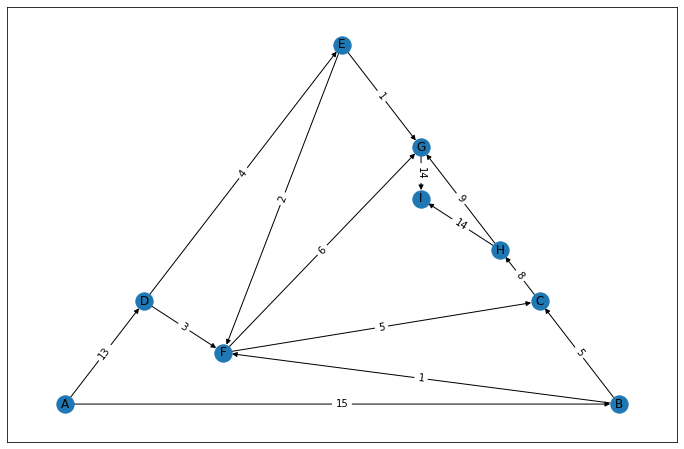

In [10]:
figure, repere = plt.subplots()
positions = nx.planar_layout(G=exemple)
nx.draw_networkx(G=exemple, pos=positions, ax=repere)
capacites = nx.get_edge_attributes(G=exemple, name="capacité")
nx.draw_networkx_edge_labels(G=exemple, pos=positions, edge_labels=capacites);

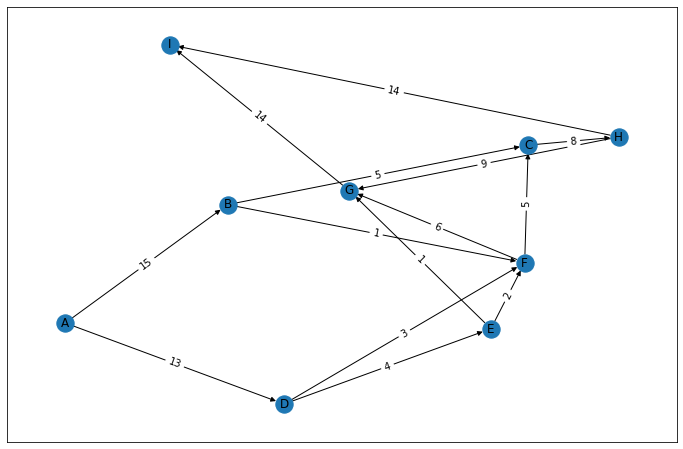

In [11]:
figure, repere = plt.subplots()
positions = nx.spring_layout(G=exemple)
nx.draw_networkx(G=exemple, pos=positions, ax=repere)
capacites = nx.get_edge_attributes(G=exemple, name="capacité")
nx.draw_networkx_edge_labels(G=exemple, pos=positions, edge_labels=capacites);

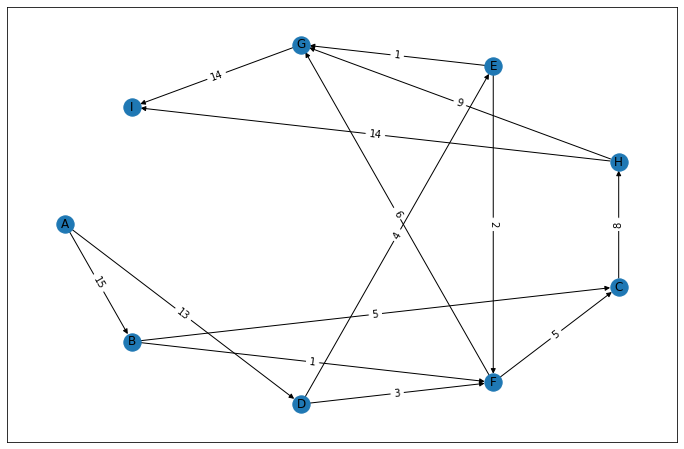

In [12]:
figure, repere = plt.subplots()
positions = nx.shell_layout(G=exemple)
nx.draw_networkx(G=exemple, pos=positions, ax=repere)
capacites = nx.get_edge_attributes(G=exemple, name="capacité")
nx.draw_networkx_edge_labels(G=exemple, pos=positions, edge_labels=capacites);

In [13]:
valeur_flot, repartition_flot = nx.maximum_flow(flowG=exemple, _s="A", _t="I", capacity="capacité")

In [14]:
valeur_flot

12

In [15]:
repartition_flot

{'A': {'B': 6, 'D': 6},
 'B': {'F': 1, 'C': 5},
 'D': {'E': 3, 'F': 3},
 'F': {'C': 0, 'G': 6},
 'C': {'H': 5},
 'H': {'G': 0, 'I': 5},
 'E': {'F': 2, 'G': 1},
 'G': {'I': 7},
 'I': {}}

## Question complémentaire

Visualiser le flot et la capacité sur une seule figure.

# Exercice complémentaire

Trouver un appariement maximal du graphe ci-dessous

<img alt="bipartie" src="bi_partie.svg" width="800">

# Exercice complémentaire

Traiter le cas ci-dessous avec **Marseille** comme source et **Paris** comme puit.

<img alt="France" src="./France_capacite.svg" width="800">

# Exercice complémentaire

Prouver mathématiquement que pour un flot admissible la somme du bilan à la source et du bilan au puit est forcément nul. Et que maximiser la différence entre ce qui sort et ce qui rentre de la source est équivalent à maximiser la différence entre ce qui rentre et ce qui sort du puit.